# AdaDeDup Stage 2: Model-Informed Adaptive Re-pruning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pickle

### Load caption embeddings and Visual Embeddings

In [3]:
# load caption embeddings
with open('./capemb.pkl', 'rb') as file:
    capemd = pickle.load(file)
    
# load clip visual embeddings
with open('./trclip.pkl', 'rb') as file:
    ires = pickle.load(file)

capemd.shape, ires.shape

((31617, 768), (31617, 768))

### Semantic clustering with 10 clusters
### Visualize clustering results with t-SNE

/home/fyk/anaconda3/envs/p39h/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


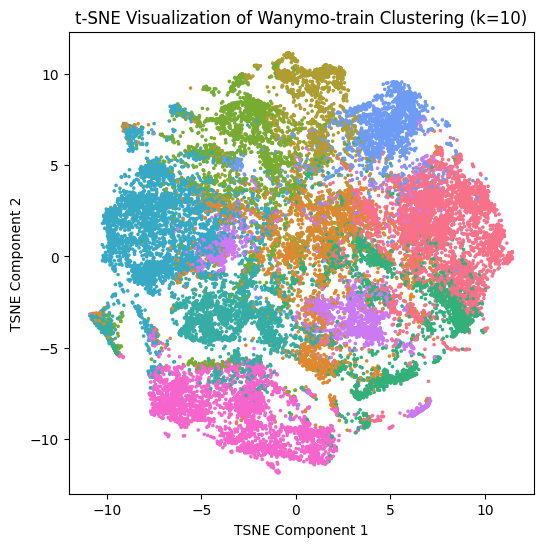

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load your dataset
data = capemd

# Preprocessing: Standardize the data (important for K-means and t-SNE)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


data = {}

# Apply K-means with a chosen number of clusters (for example, k=3)
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Get clustering results
labels = kmeans.labels_
data['Cluster'] = labels


### Step 4: Apply t-SNE


# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Add t-SNE results to the DataFrame
data['TSNE1'] = tsne_results[:, 0]
data['TSNE2'] = tsne_results[:, 1]



import seaborn as sns


palette = sns.color_palette("husl", 10)


unique_labels = np.unique(labels)
label_to_color = {label: palette[i] for i, label in enumerate(unique_labels)}

# Map each label to its corresponding color
if isinstance(labels, pd.Series):
    colors = labels.map(label_to_color)
else:
    colors = np.array([label_to_color[label] for label in labels])


# Visualize the t-SNE results
plt.figure(figsize=(6, 6))
plt.scatter(data['TSNE1'], data['TSNE2'], c=colors, s=10, marker='.')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE Visualization of Wanymo-train Clustering (k=10)')
plt.show()

In [5]:
# save cluster labels

csps = []
for i in range(k):
    csps.append([])

for i in range(31617):
    csps[labels[i]].append(i)

csps

[[85,
  88,
  90,
  93,
  94,
  95,
  96,
  97,
  98,
  100,
  109,
  113,
  114,
  116,
  118,
  119,
  120,
  121,
  131,
  133,
  134,
  138,
  140,
  141,
  143,
  145,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  208,
  209,
  210,
  219,
  220,
  222,
  340,
  351,
  558,
  559,
  561,
  562,
  563,
  564,
  566,
  567,
  569,
  570,
  571,
  574,
  575,
  583,
  590,
  594,
  678,
  681,
  682,
  691,
  712,
  713,
  761,
  762,
  768,
  771,
  774,
  787,
  789,
  790,
  791,
  831,
  869,
  870,
  1063,
  1074,
  1078,
  1079,
  1081,
  1083,
  1084,
  1088,
  1112,
  1113,
  1115,
  1116,
  1117,
  1119,
  1121,
  1122,
  1126,
  1127,
  1128,
  1129,
  1131,
  1133,
  1135,
  1136,
  1137,
  1138,
  1140,
  1142,
  1143,
  1145,
  1146,
  1147,
  1148,
  1149,
  1150,
  1151,
  1153,
  1156,
  1157,
  1158,
  1164,
  1165,
  1166,
  1170,
  1172,
  1173,
  1175,
  1176,
  1177,
  1179,
  1180,
  1183,
  1187,
  1188,
  1189,
  1190,
  1232,
  1236,
  1238,
  123

In [6]:
lcsps = []
for i in csps:
    print(len(i))
    lcsps.append(len(i))

4808
3047
2072
2790
3196
2849
4855
1966
2393
3641


### For each cluster, evaluate the trained proxy model's loss on the selected sample and pruned samples, respectively.
### Then, compute the loss difference for each cluster

In [7]:
# enter the loss differences for each cluster

dlt = -np.array([-0.2691,   
-0.0092    ,
-0.39670519,
-0.91952222,
0.37960303,
-0.30378333,
-0.25731429,
-0.31215833,
-0.66345143,
-0.6289])

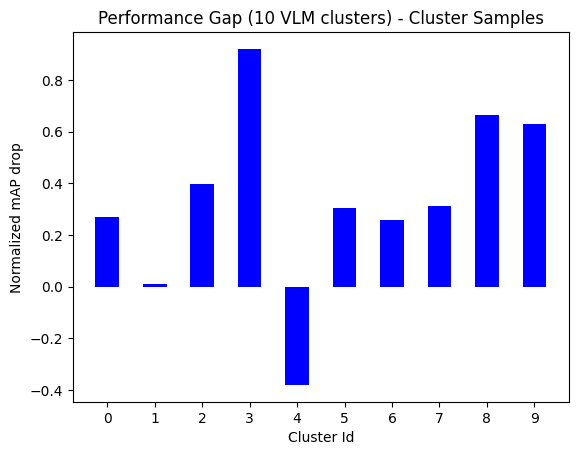

In [9]:
# visualize the loss differences

import matplotlib.pyplot as plt
import numpy as np

# your data
N = k
value1 = dlt
ind = np.arange(N)  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()

# Plot the bars

rects2 = ax.bar(ind, value1, width, color='blue')

# add some text for labels and title
ax.set_ylabel('Normalized mAP drop')
ax.set_xlabel('Cluster Id')
ax.set_title('Performance Gap (' + str(k) + ' VLM clusters) - Cluster Samples')
ax.set_xticks(ind)
# ax.legend(["Performance drop from -400 samples (7%)"])
# ax.set_xticklabels(idlcspslb)

# To display the plot
plt.show()

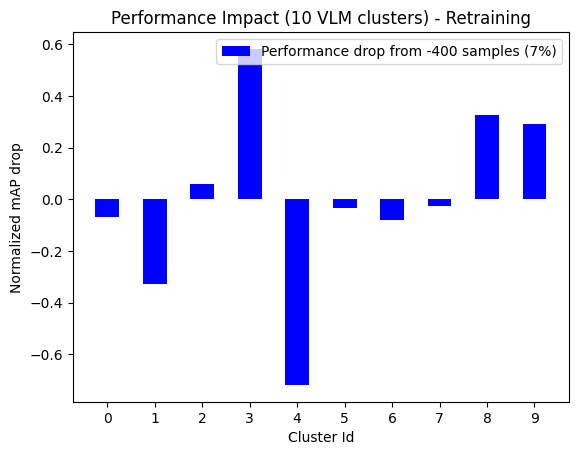

In [19]:
# normalize the loss differences

dlt2 = dlt - np.mean(dlt)

import matplotlib.pyplot as plt
import numpy as np

# your data
N = k
value1 = dlt2
ind = np.arange(N)  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()

# Plot the bars

rects2 = ax.bar(ind, value1, width, color='blue')

# add some text for labels and title
ax.set_ylabel('Normalized mAP drop')
ax.set_xlabel('Cluster Id')
ax.set_title('Performance Impact (' + str(k) + ' VLM clusters) - Retraining')
ax.set_xticks(ind)
ax.legend(["Performance drop from -400 samples (7%)"])
# ax.set_xticklabels(idlcspslb)

# To display the plot
plt.show()

### read the previous selection results

In [14]:
# normalize CLIP visual embeddings

scaler = StandardScaler()
scaled_ires = scaler.fit_transform(ires)
np.sum(scaled_ires, axis=1)

slct = []
from sklearn.metrics import pairwise_distances

for i in tqdm(csps):
    distances = pairwise_distances(scaled_ires[i,:], scaled_ires[i,:])
    for j in range(len(i)-1):
        if np.min(distances[j,j+1:]) > 11.3097:
            slct.append(i[j])
    if len(i) == 1:
        slct.append(i[0])
    else:
        slct.append(i[j])
slct = set(slct)
print(len(slct))

100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

18970


In [15]:
cspslb = []
for i in range(k):
    cspslb.append([])

for i in slct:
    cspslb[labels[i]].append(i)

cspslb

[[88,
  90,
  94,
  95,
  100,
  109,
  114,
  118,
  119,
  120,
  121,
  133,
  134,
  138,
  140,
  141,
  143,
  145,
  210,
  220,
  222,
  340,
  351,
  559,
  561,
  563,
  564,
  567,
  569,
  570,
  571,
  574,
  575,
  583,
  594,
  678,
  681,
  682,
  691,
  713,
  762,
  768,
  771,
  774,
  787,
  791,
  831,
  869,
  870,
  1063,
  1074,
  1081,
  1084,
  1088,
  1113,
  1116,
  1117,
  1122,
  1126,
  1127,
  1128,
  1129,
  1131,
  1133,
  1135,
  1136,
  1137,
  1138,
  1148,
  1149,
  1150,
  1151,
  1153,
  1158,
  1164,
  1166,
  1180,
  1187,
  1188,
  1189,
  1190,
  1242,
  1246,
  1254,
  1256,
  1262,
  1269,
  1272,
  1274,
  1276,
  1284,
  1285,
  1286,
  1289,
  1292,
  1293,
  1294,
  1295,
  1297,
  1299,
  1300,
  1302,
  1303,
  1304,
  1305,
  1308,
  1309,
  1431,
  1432,
  1433,
  1434,
  1435,
  1436,
  1437,
  1438,
  1439,
  1441,
  1445,
  1455,
  1456,
  1459,
  1462,
  1463,
  1466,
  1467,
  1547,
  1549,
  1550,
  1551,
  1570,
  1578,
  158

In [16]:
lcspslb = []
for i in cspslb:
    lcspslb.append(len(i))
    print(len(i))

2560
2236
1697
1594
1646
1648
1857
1516
1460
2756


### Generate update pruning policy for each cluster

In [20]:
tgt = 18970    # target total samples after pruning
mlt = 30    # parameter beta: strength of adaptation
import time 

base = lcspslb


tmp = np.round(base + dlt2*mlt)

if np.sum(tmp) < tgt:
    toadd = np.random.choice(nfdims, int(tgt-np.sum(tmp)), replace=True)
    for i in toadd:
        if tmp[i] < lcsps[i]:
            tmp[i] += 1


while not ((tmp <= lcsps).all() and np.sum(tmp) == tgt):
    fdims = []
    nfdims = []
    for i in range(tmp.shape[0]):
        if tmp[i] >= lcsps[i]:
            fdims.append(i)
            tmp[i] = lcsps[i]
        if tmp[i]<0:
            tmp[i] = 0

    for i in range(tmp.shape[0]):
        if i not in fdims:
            nfdims.append(i)
            
    if np.sum(tmp) < tgt:
        toadd = np.random.choice(nfdims, int(tgt-np.sum(tmp)), replace=True)
        for i in toadd:
            if tmp[i] < lcsps[i]:
                tmp[i] += 1

    if np.sum(tmp) > tgt:
        toadd = np.random.choice(list(range(tmp.shape[0])), int(np.sum(tmp)-tgt), replace=True)
        for i in toadd:
            if tmp[i] > 0:
                tmp[i] -= 1

print(np.sum(tmp))
tmp



18970.0


array([2558., 2226., 1699., 1611., 1624., 1647., 1855., 1515., 1470.,
       2765.])

### Generate adapted pruning results based on updated pruning policy

In [21]:
tgt = [2558., 2226., 1699., 1611., 1624., 1647., 1855., 1515., 1470.,
       2765.]    # target pruning policy


slcttt = []

ind = 0
for i in tqdm(csps):
    slct = []
    distances = pairwise_distances(scaled_ires[i,:], scaled_ires[i,:])
    for md in np.linspace(0,30,num=300):
        slct = []
        for j in range(len(i)-1):
            if np.min(distances[j,j+1:]) > md:
                slct.append(i[j])
        if len(i) == 1:
            slct.append(i[0])
        else:
            slct.append(i[j])
        # print(spe, len(slct), tgt[ind])
        if len(slct) <= tgt[ind]:
            # print(md)
            break

    for md2 in np.linspace(md-0.1,md,num=100):
        slct = []
        for j in range(len(i)-1):
            if np.min(distances[j,j+1:]) > md2:
                slct.append(i[j])
        if len(i) == 1:
            slct.append(i[0])
        else:
            slct.append(i[j])
        # print(ind, len(slct), tgt[ind], md2)
        if len(slct) <= tgt[ind]-1:
            # print(md2)
            break
    ind += 1
    slcttt.append(slct)


100%|██████████| 10/10 [00:47<00:00,  4.73s/it]


### Save the index of updated retained images and train the final model on the updated pruned dataset.

In [ ]:
with open('./waymo-ada-vlm10c-60-id.pkl', 'wb') as outfile:
    pickle.dump(slct , outfile, protocol=4)